In [ ]:
#PROGRAMA DE CIENCIA DE DATOS & MACHINE LEARNING CON PYTHON
#PROYECTO N°3
#AUTOR: HUANAY PÉREZ, Joseph Rubén

In [ ]:
import pandas as pd
import seaborn as sns # visualización
import statistics as stats # estadística
import random
import matplotlib.pyplot as plt

In [ ]:
#cargamos la data desde Drive

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/PROYECTO N°3-PYTHON-AUTOR-HUANAY PEREZ/Data_Nutricion_grupos.xlsx', sheet_name='Hoja1')
df.head(10)

,Individuo,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,Grupos
0,Persona 1,155.7,16.0,71.2,35.7,29.576170,90.0,98.0,0.918367,0.578035,36.446202,45.250304,13.0,27.0,32.0,34.0,A
1,Persona 2,166.5,16.0,61.0,31.8,22.364707,80.9,100.5,0.804975,0.485886,28.790714,43.437664,5.0,19.0,15.0,22.0,A
2,Persona 3,151.3,16.0,49.1,30.5,21.623567,72.0,86.0,0.837209,0.475876,29.867419,34.435097,13.0,18.0,18.0,17.0,A
3,Persona 4,151.7,16.0,54.6,32.6,23.117479,NaN,88.4,0.841629,0.490442,27.867640,39.384269,5.0,19.0,15.0,18.0,A
4,Persona 5,160.3,16.0,58.0,30.1,22.260196,NaN,97.9,0.813075,NaN,30.276688,40.439521,10.0,19.0,20.0,19.0,A
5,Persona 6,162.4,16.0,70.8,33.9,26.124451,86.5,106.1,0.815269,0.532635,31.439726,48.540674,11.0,25.0,18.0,20.0,A
6,Persona 7,167.0,16.0,47.4,30.5,17.318656,66.7,81.5,NaN,0.399401,9.690057,42.806913,3.5,7.0,6.0,6.0,A
7,Persona 8,158.7,16.0,49.3,31.2,18.979031,69.3,83.2,0.832933,0.436673,NaN,41.235083,5.5,12.0,10.5,11.5,A
8,Persona 9,158.2,16.0,91.0,37.5,35.521296,107.5,116.0,0.926724,0.679520,34.760913,59.367569,25.0,21.0,25.0,23.0,A
9,Persona 10,171.0,16.0,50.4,30.8,17.543860,66.0,80.0,0.825000,0.385965,12.045941,44.328846,3.0,7.0,8.5,9.0,A


In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Individuo                    652 non-null    object 
 1   talla                        624 non-null    float64
 2   edad                         645 non-null    float64
 3   peso_kg                      629 non-null    float64
 4   circun_cuello                623 non-null    float64
 5   IMC                          640 non-null    float64
 6   circun_cintura               637 non-null    float64
 7   cadera                       647 non-null    float64
 8   ind_cintura_cadera           639 non-null    float64
 9   ind_cintura_estatura         636 non-null    float64
 10  por_grasa_corporal           650 non-null    float64
 11  masa_corporal_magra_kg       648 non-null    float64
 12  pliegue_cutaneo_BICEPS       652 non-null    float64
 13  pliegue_cutaneo_TRIC

In [ ]:
# Verificamos los duplicados
df[df["Individuo"].duplicated()].head()

,Individuo,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,Grupos


In [ ]:
# Revisamos los datos perdidos
df.isna().sum()

Individuo                       0
talla                          28
edad                            7
peso_kg                        23
circun_cuello                  29
IMC                            12
circun_cintura                 15
cadera                          5
ind_cintura_cadera             13
ind_cintura_estatura           16
por_grasa_corporal              2
masa_corporal_magra_kg          4
pliegue_cutaneo_BICEPS          0
pliegue_cutaneo_TRICEPS         0
pliegue_cutaneo_ESCAPULAR       0
pliegue_cutaneo_SUPRAILIACO     0
Grupos                          0
dtype: int64

In [ ]:
# Data numérica
col_nums = df.select_dtypes(exclude=['object']).columns

data_nutricion_num = df[col_nums]
data_nutricion_num.head(10)

,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
0,155.7,16.0,71.2,35.7,29.576170,90.0,98.0,0.918367,0.578035,36.446202,45.250304,13.0,27.0,32.0,34.0
1,166.5,16.0,61.0,31.8,22.364707,80.9,100.5,0.804975,0.485886,28.790714,43.437664,5.0,19.0,15.0,22.0
2,151.3,16.0,49.1,30.5,21.623567,72.0,86.0,0.837209,0.475876,29.867419,34.435097,13.0,18.0,18.0,17.0
3,151.7,16.0,54.6,32.6,23.117479,NaN,88.4,0.841629,0.490442,27.867640,39.384269,5.0,19.0,15.0,18.0
4,160.3,16.0,58.0,30.1,22.260196,NaN,97.9,0.813075,NaN,30.276688,40.439521,10.0,19.0,20.0,19.0
5,162.4,16.0,70.8,33.9,26.124451,86.5,106.1,0.815269,0.532635,31.439726,48.540674,11.0,25.0,18.0,20.0
6,167.0,16.0,47.4,30.5,17.318656,66.7,81.5,NaN,0.399401,9.690057,42.806913,3.5,7.0,6.0,6.0
7,158.7,16.0,49.3,31.2,18.979031,69.3,83.2,0.832933,0.436673,NaN,41.235083,5.5,12.0,10.5,11.5
8,158.2,16.0,91.0,37.5,35.521296,107.5,116.0,0.926724,0.679520,34.760913,59.367569,25.0,21.0,25.0,23.0
9,171.0,16.0,50.4,30.8,17.543860,66.0,80.0,0.825000,0.385965,12.045941,44.328846,3.0,7.0,8.5,9.0


In [ ]:
# Data categórica 
col_cat = df.select_dtypes(include=['object']).columns 

data_nutricion_cat = df[col_cat]
data_nutricion_cat.head(10)

,Individuo,Grupos
0,Persona 1,A
1,Persona 2,A
2,Persona 3,A
3,Persona 4,A
4,Persona 5,A
5,Persona 6,A
6,Persona 7,A
7,Persona 8,A
8,Persona 9,A
9,Persona 10,A


In [ ]:
data_nutricion_cat.isna().sum()

Individuo    0
Grupos       0
dtype: int64

In [ ]:
# IMPUTACION
# Reemplazando con la mediana de cada columna: Variables Cuantitativas
#Como primera aproximacion

data_nutricion_num2 = data_nutricion_num.apply(lambda x: x.fillna(x.median()), axis = 0)

col_num = data_nutricion_num2.columns

data_nutricion_num2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   talla                        652 non-null    float64
 1   edad                         652 non-null    float64
 2   peso_kg                      652 non-null    float64
 3   circun_cuello                652 non-null    float64
 4   IMC                          652 non-null    float64
 5   circun_cintura               652 non-null    float64
 6   cadera                       652 non-null    float64
 7   ind_cintura_cadera           652 non-null    float64
 8   ind_cintura_estatura         652 non-null    float64
 9   por_grasa_corporal           652 non-null    float64
 10  masa_corporal_magra_kg       652 non-null    float64
 11  pliegue_cutaneo_BICEPS       652 non-null    float64
 12  pliegue_cutaneo_TRICEPS      652 non-null    float64
 13  pliegue_cutaneo_ESCA

In [ ]:
# Unimos los DataFrame imputados

data_nutricion_f = pd.merge(data_nutricion_num2, data_nutricion_cat, left_index=True, right_index=True)
data_nutricion_f.head(10)

,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,Individuo,Grupos
0,155.7,16.0,71.2,35.7,29.576170,90.0,98.0,0.918367,0.578035,36.446202,45.250304,13.0,27.0,32.0,34.0,Persona 1,A
1,166.5,16.0,61.0,31.8,22.364707,80.9,100.5,0.804975,0.485886,28.790714,43.437664,5.0,19.0,15.0,22.0,Persona 2,A
2,151.3,16.0,49.1,30.5,21.623567,72.0,86.0,0.837209,0.475876,29.867419,34.435097,13.0,18.0,18.0,17.0,Persona 3,A
3,151.7,16.0,54.6,32.6,23.117479,73.6,88.4,0.841629,0.490442,27.867640,39.384269,5.0,19.0,15.0,18.0,Persona 4,A
4,160.3,16.0,58.0,30.1,22.260196,73.6,97.9,0.813075,0.464779,30.276688,40.439521,10.0,19.0,20.0,19.0,Persona 5,A
5,162.4,16.0,70.8,33.9,26.124451,86.5,106.1,0.815269,0.532635,31.439726,48.540674,11.0,25.0,18.0,20.0,Persona 6,A
6,167.0,16.0,47.4,30.5,17.318656,66.7,81.5,0.827897,0.399401,9.690057,42.806913,3.5,7.0,6.0,6.0,Persona 7,A
7,158.7,16.0,49.3,31.2,18.979031,69.3,83.2,0.832933,0.436673,26.094372,41.235083,5.5,12.0,10.5,11.5,Persona 8,A
8,158.2,16.0,91.0,37.5,35.521296,107.5,116.0,0.926724,0.679520,34.760913,59.367569,25.0,21.0,25.0,23.0,Persona 9,A
9,171.0,16.0,50.4,30.8,17.543860,66.0,80.0,0.825000,0.385965,12.045941,44.328846,3.0,7.0,8.5,9.0,Persona 10,A


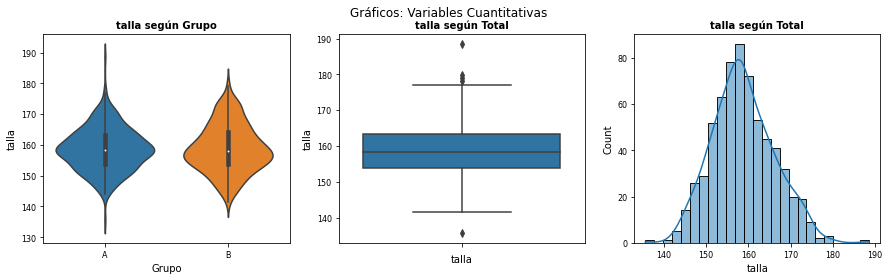

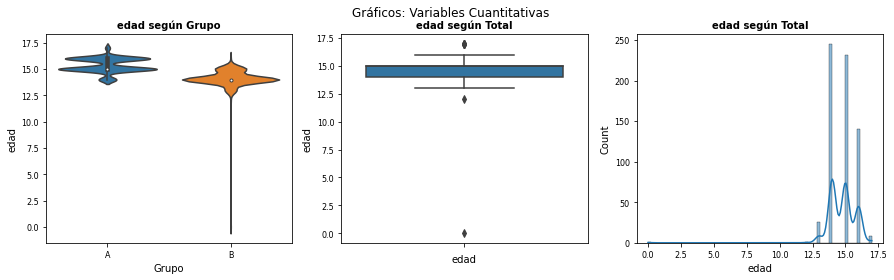

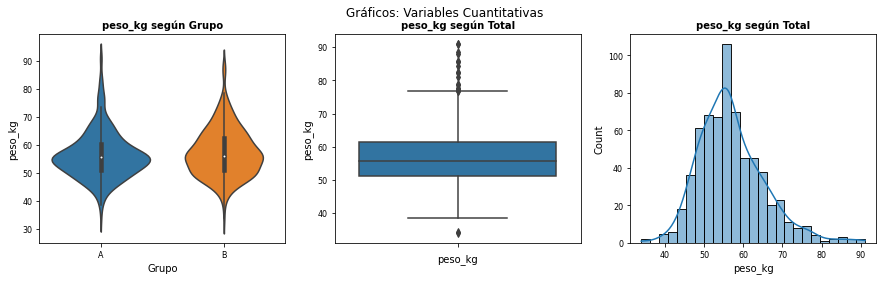

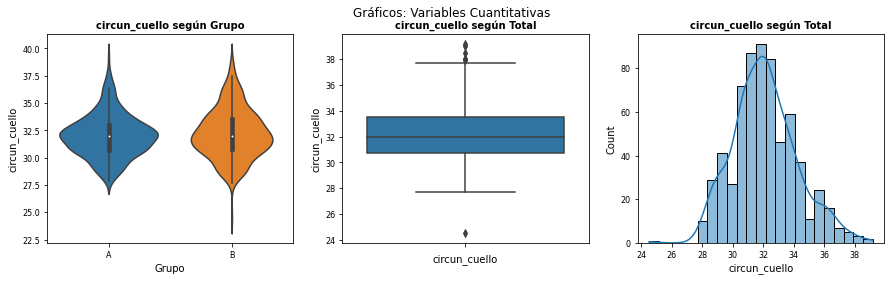

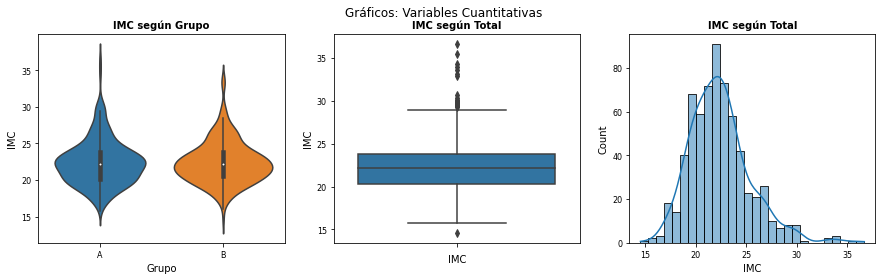

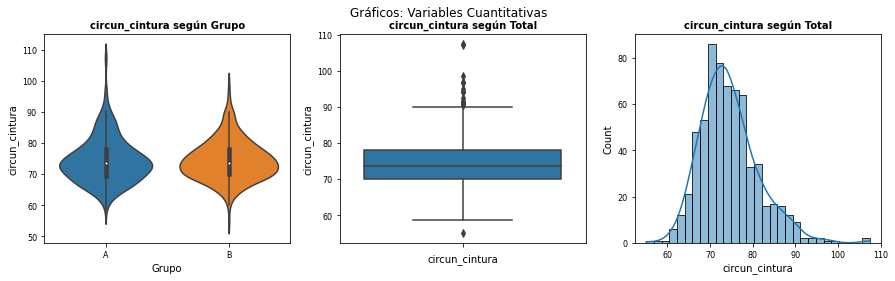

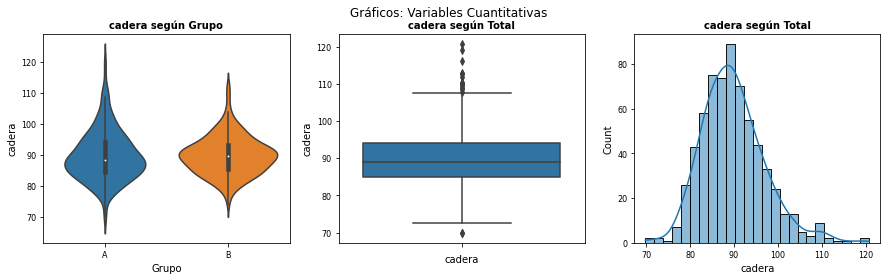

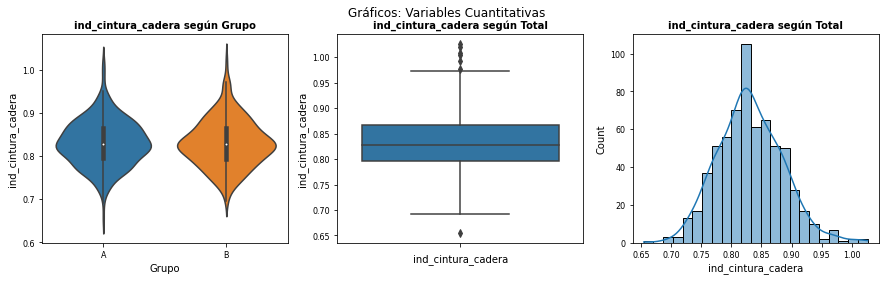

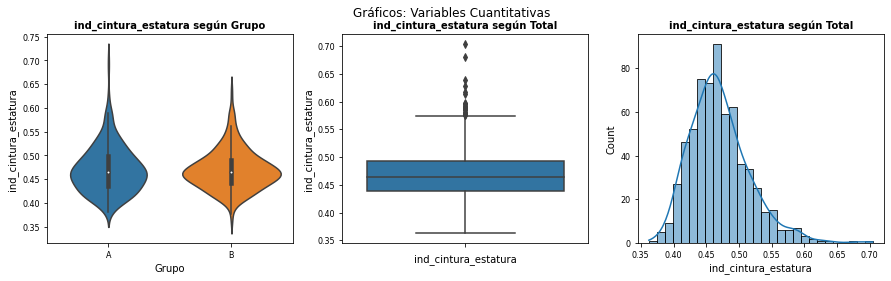

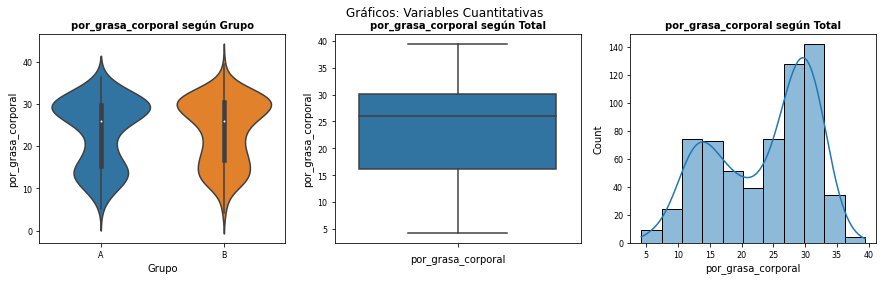

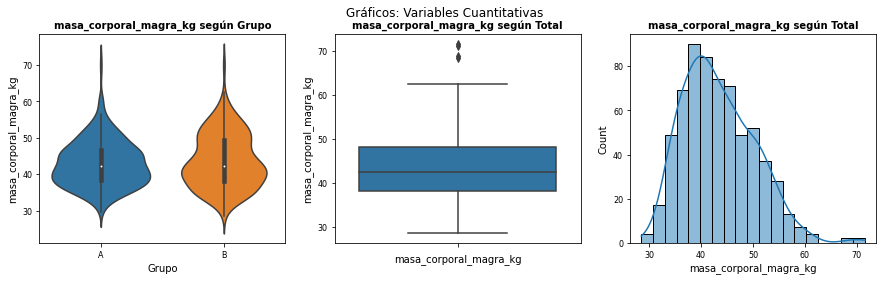

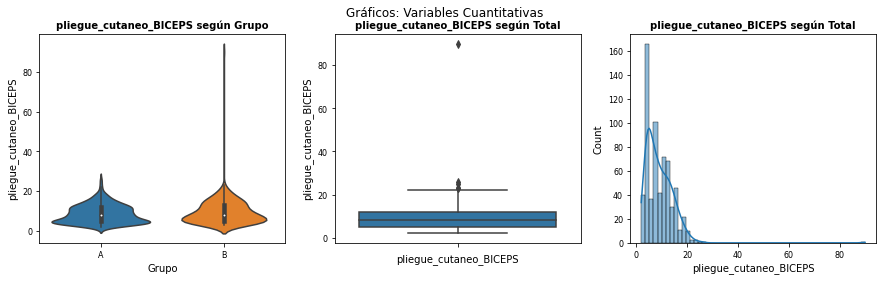

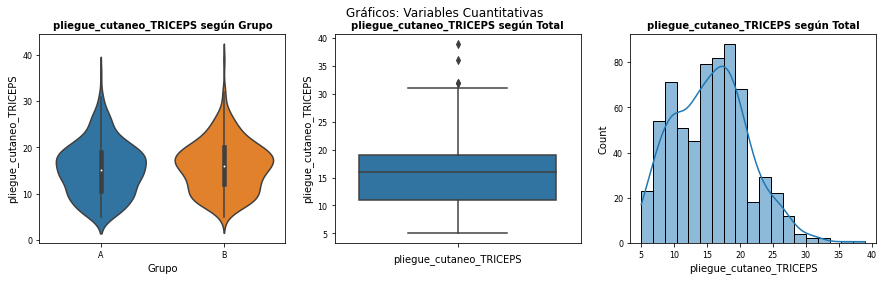

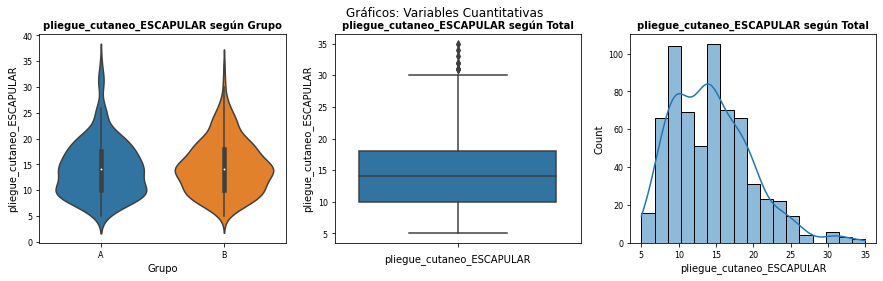

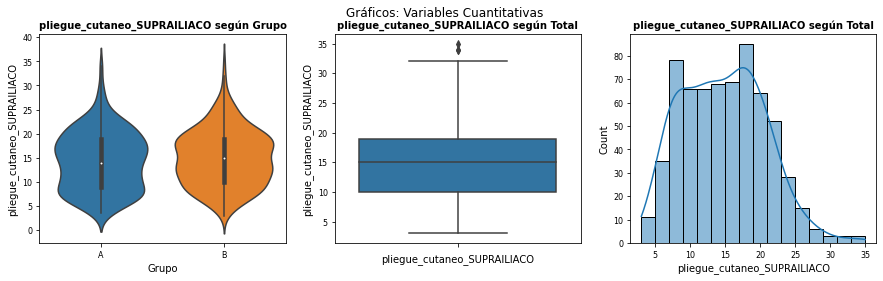

In [ ]:
# Graficando las variables cuantitativas

for i, colum in enumerate(col_num): 
    fig, ax = plt.subplots(1, 3, figsize=(15, 3.84))
    fig.suptitle('Gráficos: Variables Cuantitativas')
    
    sns.violinplot(x = 'Grupos', y = colum,  data  = data_nutricion_f, ax=ax[0])
    ax[0].set_title(str(colum) + " según Grupo", fontsize = 10, fontweight = "bold")
    ax[0].tick_params(labelsize = 8)
    ax[0].set_xlabel('Grupo')

    sns.boxplot(y = colum,  data  = data_nutricion_f, ax=ax[1])
    ax[1].set_title(str(colum) + " según Total", fontsize = 10, fontweight = "bold")
    ax[1].tick_params(labelsize = 8)
    ax[1].set_xlabel(colum)

    sns.histplot(x=colum, data=data_nutricion_f, kde= True, ax=ax[2])
    ax[2].set_title(str(colum) + " según Total", fontsize = 10, fontweight = "bold")
    ax[2].tick_params(labelsize = 8)
    ax[2].set_xlabel(colum)

In [ ]:
# Graficando las variables cualitativas

col_cuali =list(col_cat)
col_cuali.remove('Individuo')
print(col_cuali)

['Grupos']


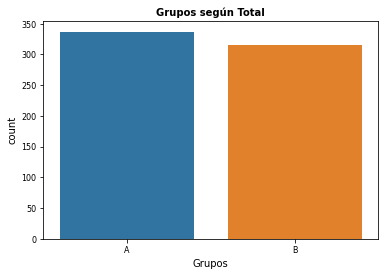

In [ ]:

fig, ax=plt.subplots()

sns.countplot(x='Grupos', data=data_nutricion_f)
ax.set_title('Grupos' + " según Total", fontsize = 10, fontweight = "bold")
ax.tick_params(labelsize = 8)
ax.set_xlabel('Grupos')

plt.show()

In [ ]:
#ANALISIS DESCRIPTIVO

percentiles = [.25, .5, .75]
descrip = data_nutricion_num2.describe(percentiles=percentiles).T
descrip

,count,mean,std,min,25%,50%,75%,max
talla,652.0,158.794785,7.316419,135.600000,153.800000,158.200000,163.300000,188.600000
edad,652.0,14.756135,1.048901,0.000000,14.000000,15.000000,15.000000,17.000000
peso_kg,652.0,56.903221,8.442418,33.900000,51.200000,55.800000,61.450000,91.100000
circun_cuello,652.0,32.131902,2.108332,24.500000,30.700000,32.000000,33.500000,39.200000
IMC,652.0,22.421825,3.018874,14.537886,20.306828,22.174447,23.855081,36.708603
circun_cintura,652.0,74.496319,6.837227,55.000000,70.000000,73.600000,78.000000,107.500000
cadera,652.0,89.861810,7.183395,69.800000,85.000000,89.000000,94.000000,120.800000
ind_cintura_cadera,652.0,0.830985,0.054173,0.654018,0.795298,0.827897,0.866667,1.026528
ind_cintura_estatura,652.0,0.470474,0.045890,0.362319,0.439406,0.464779,0.493610,0.704411
por_grasa_corporal,652.0,23.546831,7.849954,4.214310,16.127803,26.094372,30.073493,39.445282


##PRUEBA DE NORMALIDAD

PLANTEAMIENTO DE LAS HIPÓTESIS

Ho: Los datos estan normalmente distribuidos      
Ha: Los datos no estan normalmente distribuidos

Nivel de significancia = 5% (0.05)

In [ ]:
#import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro # n <= 50
from scipy.stats import kstest  # n > 50
from scipy.stats import zscore

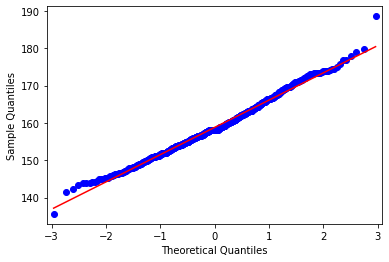

In [ ]:
# Prueba normalidad: 

qqplot(data_nutricion_f['talla'] , line='s')
plt.show()

In [ ]:
#Cuando n > 50

stat, p = kstest(data_nutricion_f['talla'], 'norm')

print('Estadisticos=%.3f, p-value=%.3f' % (stat, p))

Estadisticos=1.000, p-value=0.000


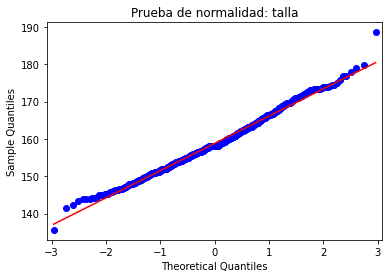

Estadisticos=1.000, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable talla no estan normalmente distribuidos




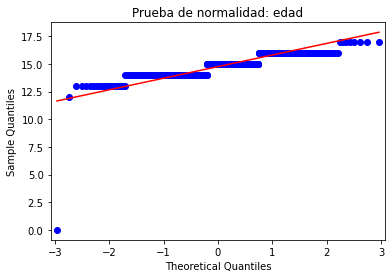

Estadisticos=0.998, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable edad no estan normalmente distribuidos




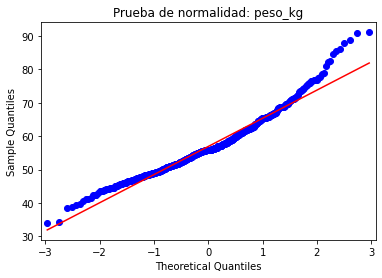

Estadisticos=1.000, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable peso_kg no estan normalmente distribuidos




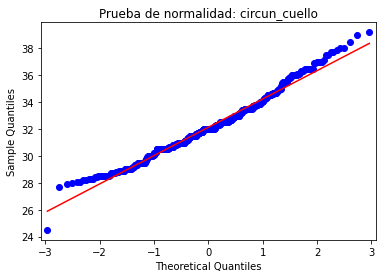

Estadisticos=1.000, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable circun_cuello no estan normalmente distribuidos




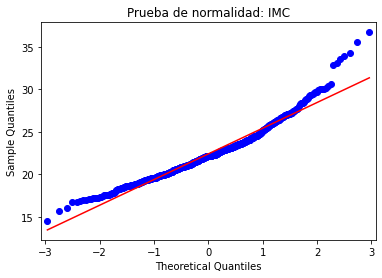

Estadisticos=1.000, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable IMC no estan normalmente distribuidos




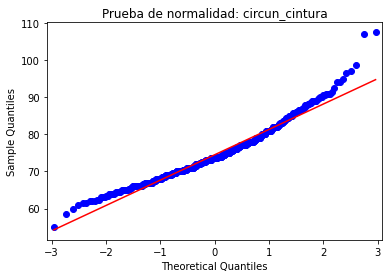

Estadisticos=1.000, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable circun_cintura no estan normalmente distribuidos




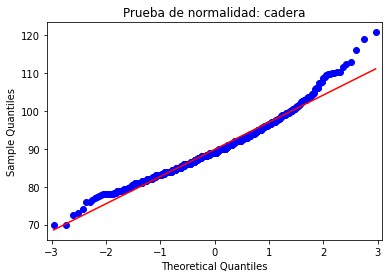

Estadisticos=1.000, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable cadera no estan normalmente distribuidos




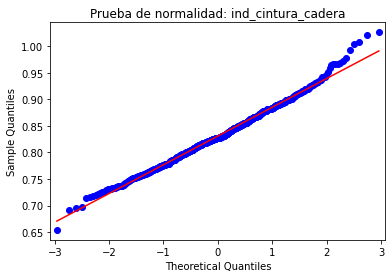

Estadisticos=0.756, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable ind_cintura_cadera no estan normalmente distribuidos




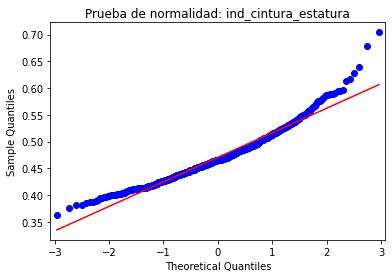

Estadisticos=0.645, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable ind_cintura_estatura no estan normalmente distribuidos




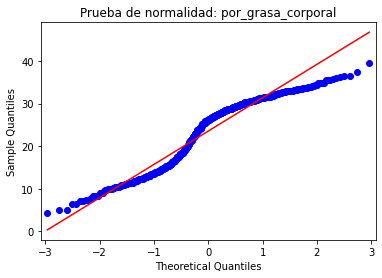

Estadisticos=1.000, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable por_grasa_corporal no estan normalmente distribuidos




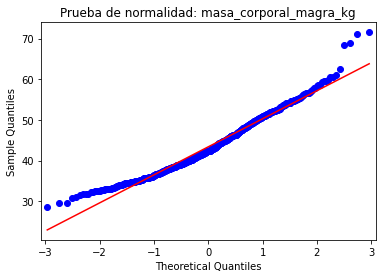

Estadisticos=1.000, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable masa_corporal_magra_kg no estan normalmente distribuidos




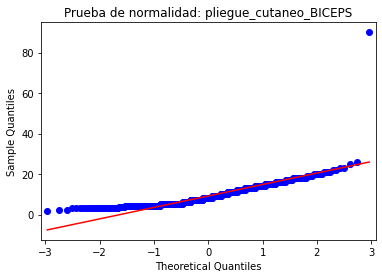

Estadisticos=0.994, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable pliegue_cutaneo_BICEPS no estan normalmente distribuidos




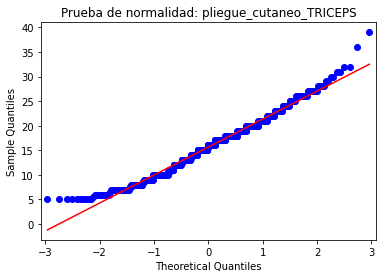

Estadisticos=1.000, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable pliegue_cutaneo_TRICEPS no estan normalmente distribuidos




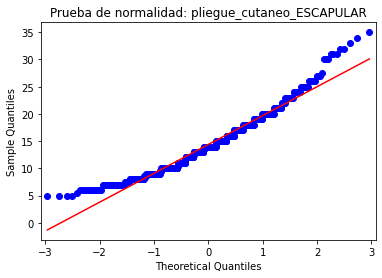

Estadisticos=1.000, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable pliegue_cutaneo_ESCAPULAR no estan normalmente distribuidos




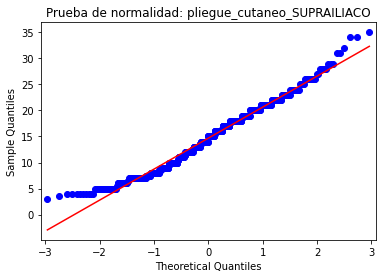

Estadisticos=0.999, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable pliegue_cutaneo_SUPRAILIACO no estan normalmente distribuidos


In [ ]:
for col in col_num:
  print('\n')
  qqplot(data_nutricion_f[col] , line='s')
  plt.title('Prueba de normalidad: ' + str(col))
  plt.show()

  #Cuando n > 50
  stat, p = kstest(data_nutricion_f[col], 'norm')
  print('Estadisticos=%.3f, p-value=%.3f' % (stat, p))

  #Decisión:
  if p <= 0.05:
    print('p <= 0.05')
    print('Con un nivel de significancia del 5%, se afirma que, los datos de la variable '+ str(col) + ' no estan normalmente distribuidos')
  else:
    print('p > 0.05')
    print('Con un nivel de significancia del 5%, se afirma que, los datos de la variable '+ str(col) + ' estan normalmente distribuidos')




## Normalizando variables

normalización = ( x – min(x) ) / ( max(x) – min(x) )

Los valores normalizados para todos los demás valores del conjunto de datos estarán entre 0 y 1.

In [ ]:
# Normalizamos las variables numéricas

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_nutricion_num2_norm = scaler.fit_transform(data_nutricion_num2)
data_nutricion_num2_norm



array([[0.37924528, 0.94117647, 0.6520979 , ..., 0.64705882, 0.9       ,
        0.96875   ],
       [0.58301887, 0.94117647, 0.47377622, ..., 0.41176471, 0.33333333,
        0.59375   ],
       [0.29622642, 0.94117647, 0.26573427, ..., 0.38235294, 0.43333333,
        0.4375    ],
       ...,
       [0.34716981, 0.88235294, 0.43706294, ..., 0.20588235, 0.3       ,
        0.46875   ],
       [0.73018868, 0.82352941, 0.95804196, ..., 0.32352941, 0.43333333,
        0.53125   ],
       [0.42264151, 0.82352941, 0.41433566, ..., 0.55882353, 0.5       ,
        0.65625   ]])

In [ ]:
data_nutricion_num2_norm = pd.DataFrame(
    data=data_nutricion_num2_norm,
    columns=col_num)
data_nutricion_num2_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   talla                        652 non-null    float64
 1   edad                         652 non-null    float64
 2   peso_kg                      652 non-null    float64
 3   circun_cuello                652 non-null    float64
 4   IMC                          652 non-null    float64
 5   circun_cintura               652 non-null    float64
 6   cadera                       652 non-null    float64
 7   ind_cintura_cadera           652 non-null    float64
 8   ind_cintura_estatura         652 non-null    float64
 9   por_grasa_corporal           652 non-null    float64
 10  masa_corporal_magra_kg       652 non-null    float64
 11  pliegue_cutaneo_BICEPS       652 non-null    float64
 12  pliegue_cutaneo_TRICEPS      652 non-null    float64
 13  pliegue_cutaneo_ESCA

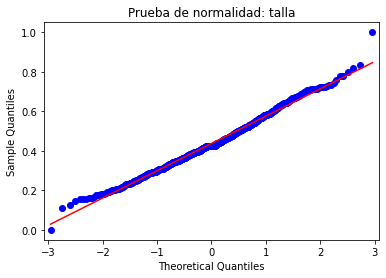

Estadisticos=0.557, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable talla no estan normalmente distribuidos




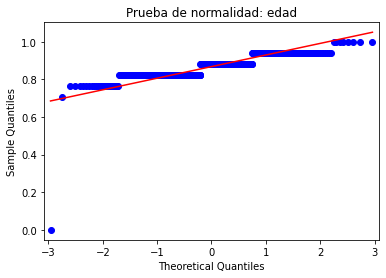

Estadisticos=0.775, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable edad no estan normalmente distribuidos




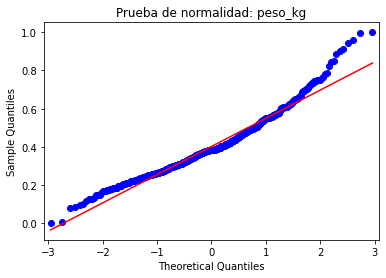

Estadisticos=0.545, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable peso_kg no estan normalmente distribuidos




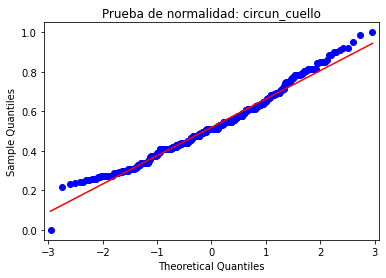

Estadisticos=0.591, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable circun_cuello no estan normalmente distribuidos




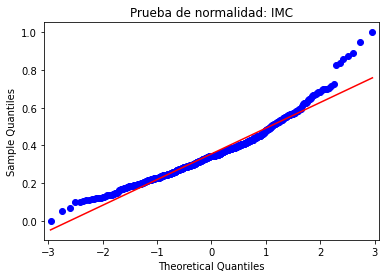

Estadisticos=0.535, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable IMC no estan normalmente distribuidos




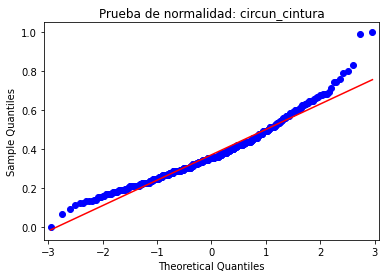

Estadisticos=0.544, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable circun_cintura no estan normalmente distribuidos




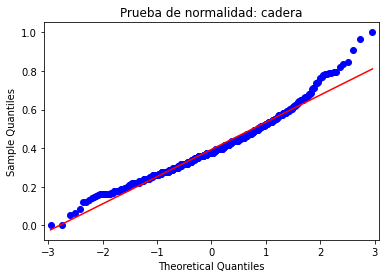

Estadisticos=0.545, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable cadera no estan normalmente distribuidos




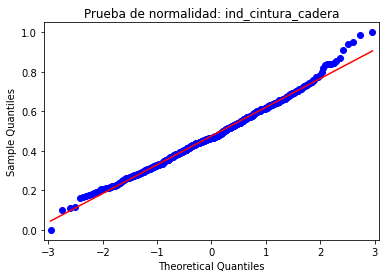

Estadisticos=0.562, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable ind_cintura_cadera no estan normalmente distribuidos




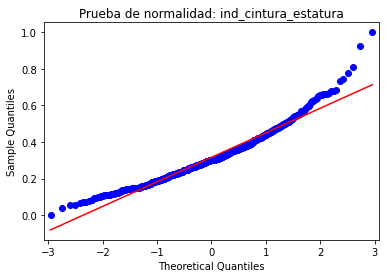

Estadisticos=0.524, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable ind_cintura_estatura no estan normalmente distribuidos




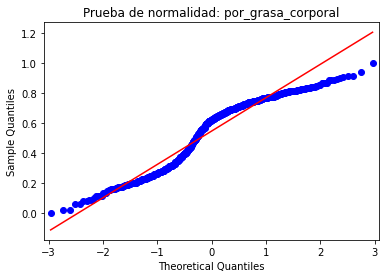

Estadisticos=0.534, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable por_grasa_corporal no estan normalmente distribuidos




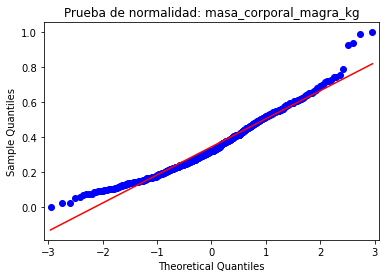

Estadisticos=0.520, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable masa_corporal_magra_kg no estan normalmente distribuidos




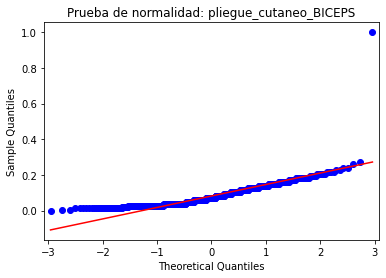

Estadisticos=0.501, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable pliegue_cutaneo_BICEPS no estan normalmente distribuidos




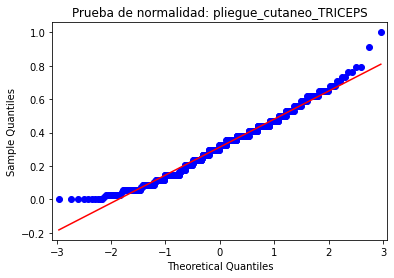

Estadisticos=0.500, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable pliegue_cutaneo_TRICEPS no estan normalmente distribuidos




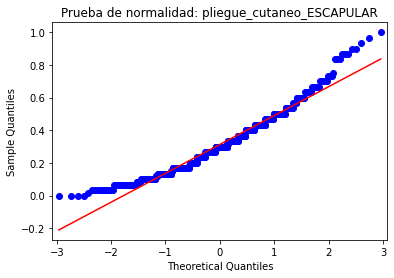

Estadisticos=0.506, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable pliegue_cutaneo_ESCAPULAR no estan normalmente distribuidos




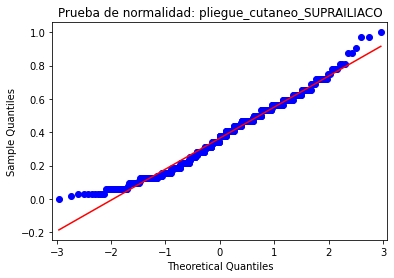

Estadisticos=0.509, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable pliegue_cutaneo_SUPRAILIACO no estan normalmente distribuidos


In [ ]:
for col in col_num:
  print('\n')
  qqplot(data_nutricion_num2_norm[col] , line='s')
  plt.title('Prueba de normalidad: ' + str(col))
  plt.show()

  #Cuando n > 50
  stat, p = kstest(data_nutricion_num2_norm[col], 'norm')
  print('Estadisticos=%.3f, p-value=%.3f' % (stat, p))

  #Decisión:
  if p <= 0.05:
    print('p <= 0.05')
    print('Con un nivel de significancia del 5%, se afirma que, los datos de la variable '+ str(col) + ' no estan normalmente distribuidos')
  else:
    print('p > 0.05')
    print('Con un nivel de significancia del 5%, se afirma que, los datos de la variable '+ str(col) + ' estan normalmente distribuidos')


##Estandarización de variables

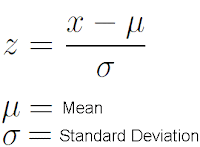



In [ ]:
data_nutricion_num2_estand = zscore(data_nutricion_num2, axis=1)
data_nutricion_num2_estand.head()

,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
0,2.718635,-0.733757,0.630395,-0.246913,-0.398251,1.094997,1.292700,-1.106468,-1.114879,-0.228472,-0.010898,-0.807896,-0.461916,-0.338351,-0.288925
1,2.877885,-0.570690,0.460446,-0.208647,-0.424848,0.916437,1.365553,-0.918870,-0.926182,-0.277602,0.058020,-0.822745,-0.501947,-0.593604,-0.433205
2,2.982275,-0.554400,0.310818,-0.175377,-0.407403,0.909412,1.275365,-0.950748,-0.960193,-0.191913,-0.072516,-0.632818,-0.502121,-0.502121,-0.528260
3,2.910149,-0.554155,0.431270,-0.130371,-0.372452,0.916323,1.294155,-0.941135,-0.950101,-0.251184,0.042825,-0.834976,-0.477568,-0.579684,-0.503097
4,2.912628,-0.577503,0.438335,-0.236471,-0.426090,0.815647,1.403382,-0.944824,-0.953248,-0.232198,0.013607,-0.722623,-0.504943,-0.480756,-0.504943


In [ ]:
data_nutricion_num2_estand = pd.DataFrame(
    data=data_nutricion_num2_estand,
    columns=col_num)

data_nutricion_num2_estand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   talla                        652 non-null    float64
 1   edad                         652 non-null    float64
 2   peso_kg                      652 non-null    float64
 3   circun_cuello                652 non-null    float64
 4   IMC                          652 non-null    float64
 5   circun_cintura               652 non-null    float64
 6   cadera                       652 non-null    float64
 7   ind_cintura_cadera           652 non-null    float64
 8   ind_cintura_estatura         652 non-null    float64
 9   por_grasa_corporal           652 non-null    float64
 10  masa_corporal_magra_kg       652 non-null    float64
 11  pliegue_cutaneo_BICEPS       652 non-null    float64
 12  pliegue_cutaneo_TRICEPS      652 non-null    float64
 13  pliegue_cutaneo_ESCA

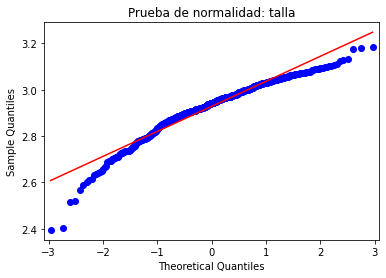

Estadisticos=0.992, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable talla no estan normalmente distribuidos




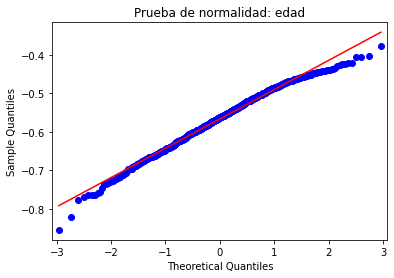

Estadisticos=0.657, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable edad no estan normalmente distribuidos




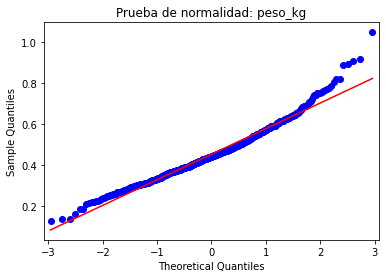

Estadisticos=0.575, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable peso_kg no estan normalmente distribuidos




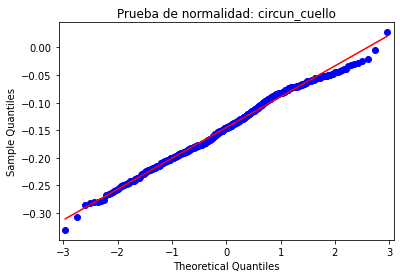

Estadisticos=0.505, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable circun_cuello no estan normalmente distribuidos




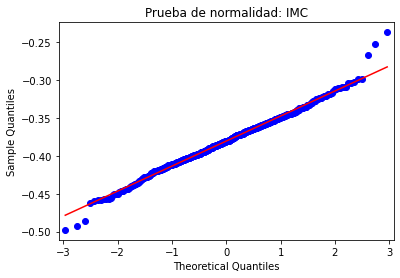

Estadisticos=0.613, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable IMC no estan normalmente distribuidos




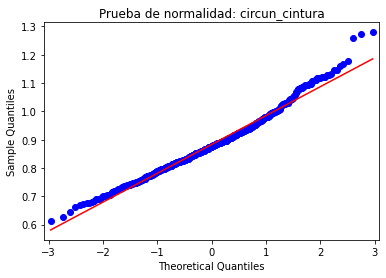

Estadisticos=0.743, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable circun_cintura no estan normalmente distribuidos




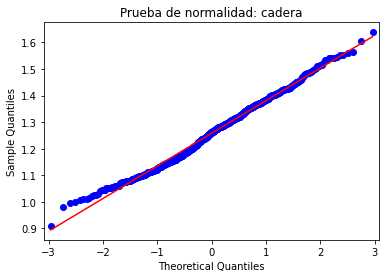

Estadisticos=0.837, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable cadera no estan normalmente distribuidos




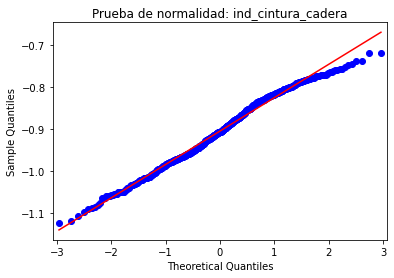

Estadisticos=0.767, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable ind_cintura_cadera no estan normalmente distribuidos




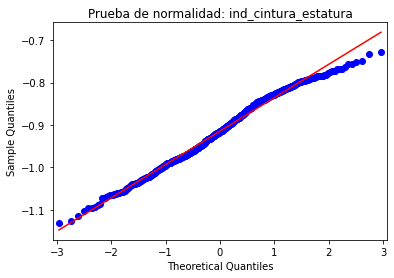

Estadisticos=0.770, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable ind_cintura_estatura no estan normalmente distribuidos




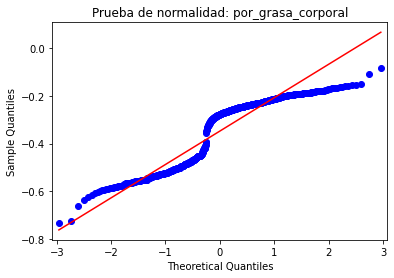

Estadisticos=0.557, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable por_grasa_corporal no estan normalmente distribuidos




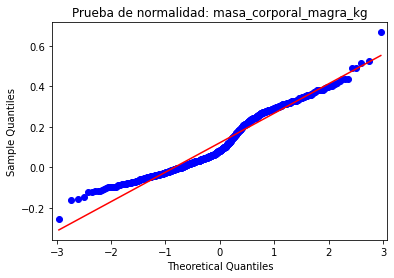

Estadisticos=0.445, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable masa_corporal_magra_kg no estan normalmente distribuidos




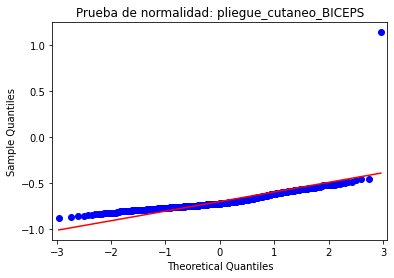

Estadisticos=0.681, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable pliegue_cutaneo_BICEPS no estan normalmente distribuidos




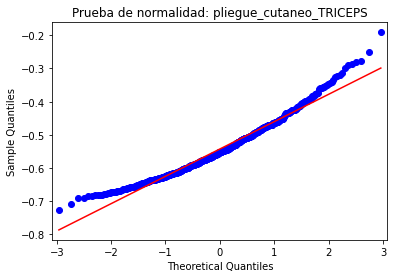

Estadisticos=0.615, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable pliegue_cutaneo_TRICEPS no estan normalmente distribuidos




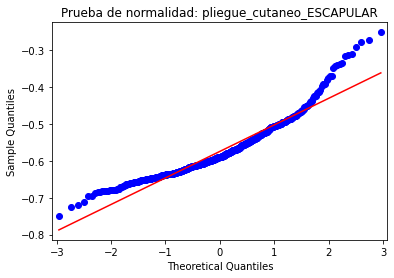

Estadisticos=0.628, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable pliegue_cutaneo_ESCAPULAR no estan normalmente distribuidos




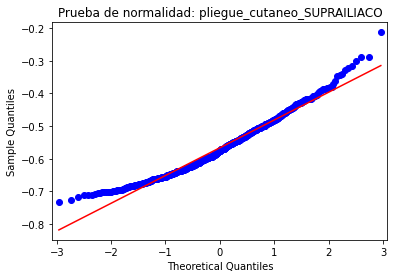

Estadisticos=0.630, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable pliegue_cutaneo_SUPRAILIACO no estan normalmente distribuidos


In [ ]:
for col in col_num:
  print('\n')
  qqplot(data_nutricion_num2_estand[col] , line='s')
  plt.title('Prueba de normalidad: ' + str(col))
  plt.show()

  #Cuando n > 50
  stat, p = kstest(data_nutricion_num2_estand[col], 'norm')
  print('Estadisticos=%.3f, p-value=%.3f' % (stat, p))

  #Decisión:
  if p <= 0.05:
    print('p <= 0.05')
    print('Con un nivel de significancia del 5%, se afirma que, los datos de la variable '+ str(col) + ' no estan normalmente distribuidos')
  else:
    print('p > 0.05')
    print('Con un nivel de significancia del 5%, se afirma que, los datos de la variable '+ str(col) + ' estan normalmente distribuidos')


## Normalización con SKLEARN

Estandariza los datos eliminando la media y escalando los datos de forma que su varianza sea igual a 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

skler = StandardScaler()
data_nutricion_num2_skler = skler.fit_transform(data_nutricion_num2)
data_nutricion_num2_skler


array([[-0.42331655,  1.18678536,  1.69474626, ...,  1.9958441 ,
         3.32175318,  3.2475333 ],
       [ 1.05394871,  1.18678536,  0.48563394, ...,  0.58942383,
         0.11625847,  1.23048952],
       [-1.02516536,  1.18678536, -0.92499711, ...,  0.4136213 ,
         0.68193401,  0.39005461],
       ...,
       [-0.65584905,  0.23267432,  0.23669905, ..., -0.6411939 ,
        -0.07230004,  0.55814159],
       [ 2.12086251, -0.72143672,  3.76920369, ...,  0.06201623,
         0.68193401,  0.89431555],
       [-0.10871377, -0.72143672,  0.08259649, ...,  1.4684365 ,
         1.05905103,  1.56666348]])

In [ ]:
import numpy as np
np.var(data_nutricion_num2_skler[:, 1]) # revisamos la varianza de una de las columnas

1.0

In [ ]:
data_nutricion_num2_skler = pd.DataFrame(
    data=data_nutricion_num2_skler,
    columns=col_num)
data_nutricion_num2_skler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   talla                        652 non-null    float64
 1   edad                         652 non-null    float64
 2   peso_kg                      652 non-null    float64
 3   circun_cuello                652 non-null    float64
 4   IMC                          652 non-null    float64
 5   circun_cintura               652 non-null    float64
 6   cadera                       652 non-null    float64
 7   ind_cintura_cadera           652 non-null    float64
 8   ind_cintura_estatura         652 non-null    float64
 9   por_grasa_corporal           652 non-null    float64
 10  masa_corporal_magra_kg       652 non-null    float64
 11  pliegue_cutaneo_BICEPS       652 non-null    float64
 12  pliegue_cutaneo_TRICEPS      652 non-null    float64
 13  pliegue_cutaneo_ESCA

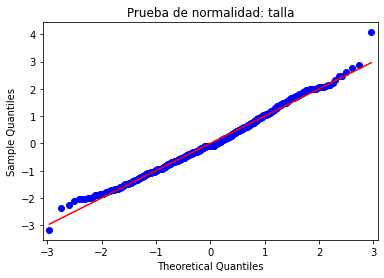

Estadisticos=0.057, p-value=0.028
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable talla no estan normalmente distribuidos




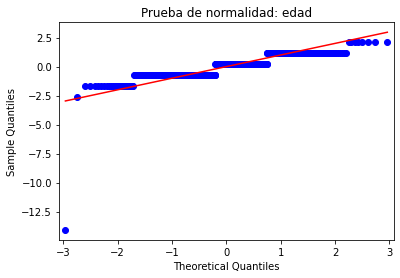

Estadisticos=0.192, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable edad no estan normalmente distribuidos




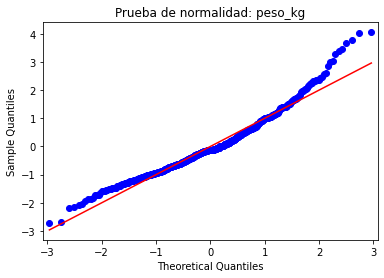

Estadisticos=0.089, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable peso_kg no estan normalmente distribuidos




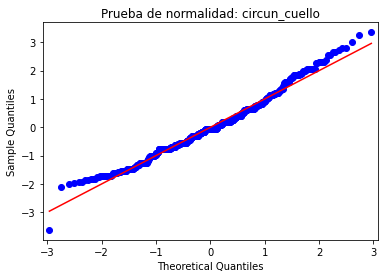

Estadisticos=0.072, p-value=0.002
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable circun_cuello no estan normalmente distribuidos




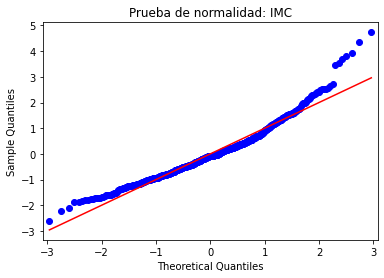

Estadisticos=0.072, p-value=0.002
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable IMC no estan normalmente distribuidos




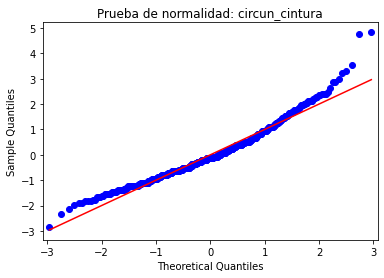

Estadisticos=0.078, p-value=0.001
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable circun_cintura no estan normalmente distribuidos




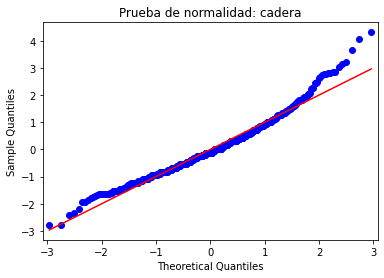

Estadisticos=0.069, p-value=0.004
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable cadera no estan normalmente distribuidos




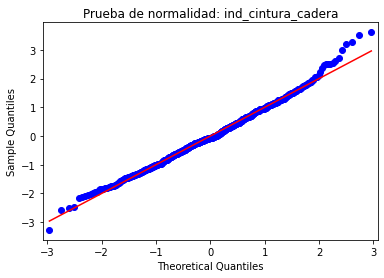

Estadisticos=0.042, p-value=0.203
p > 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable ind_cintura_cadera estan normalmente distribuidos




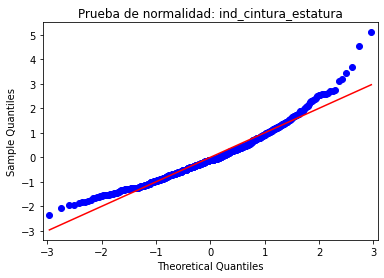

Estadisticos=0.071, p-value=0.003
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable ind_cintura_estatura no estan normalmente distribuidos




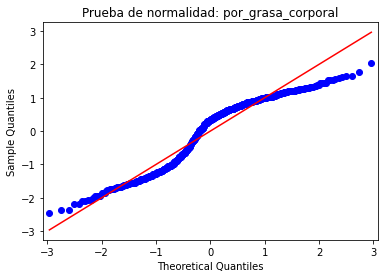

Estadisticos=0.137, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable por_grasa_corporal no estan normalmente distribuidos




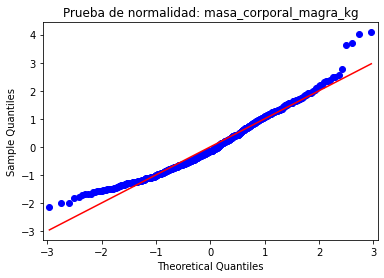

Estadisticos=0.068, p-value=0.004
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable masa_corporal_magra_kg no estan normalmente distribuidos




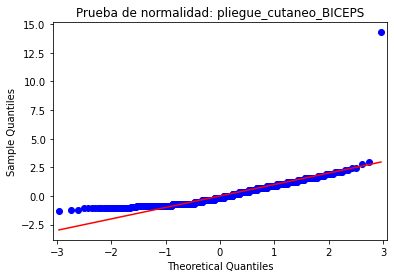

Estadisticos=0.133, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable pliegue_cutaneo_BICEPS no estan normalmente distribuidos




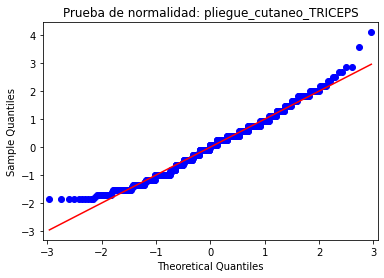

Estadisticos=0.067, p-value=0.006
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable pliegue_cutaneo_TRICEPS no estan normalmente distribuidos




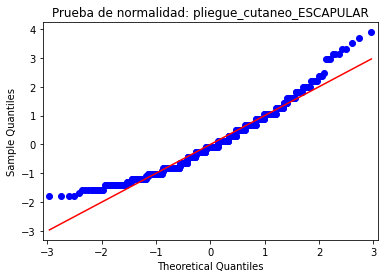

Estadisticos=0.084, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable pliegue_cutaneo_ESCAPULAR no estan normalmente distribuidos




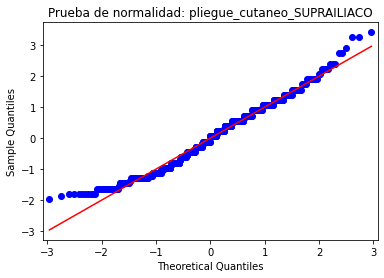

Estadisticos=0.070, p-value=0.003
p <= 0.05
Con un nivel de significancia del 5%, se afirma que, los datos de la variable pliegue_cutaneo_SUPRAILIACO no estan normalmente distribuidos


In [ ]:
for col in col_num:
  print('\n')
  qqplot(data_nutricion_num2_skler[col] , line='s')
  plt.title('Prueba de normalidad: ' + str(col))
  plt.show()

  #Cuando n > 50
  stat, p = kstest(data_nutricion_num2_skler[col], 'norm')
  print('Estadisticos=%.3f, p-value=%.3f' % (stat, p))

  #Decisión:
  if p <= 0.05:
    print('p <= 0.05')
    print('Con un nivel de significancia del 5%, se afirma que, los datos de la variable '+ str(col) + ' no estan normalmente distribuidos')
  else:
    print('p > 0.05')
    print('Con un nivel de significancia del 5%, se afirma que, los datos de la variable '+ str(col) + ' estan normalmente distribuidos')


### Prueba de Correlacion: No parametrica


Ho: Las variables A y B son mutuamente independientes.

Ha: Las variables A y B son mutuamente dependientes.

Nivel de significancia: 5%

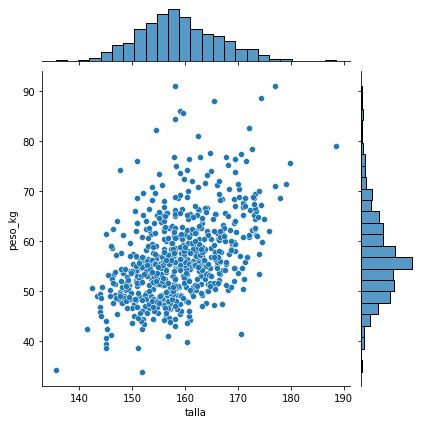

In [ ]:
# Graficamos las variables a correlacionar

sns.jointplot(x=data_nutricion_num2['talla'], y=data_nutricion_num2['peso_kg'])
plt.show()

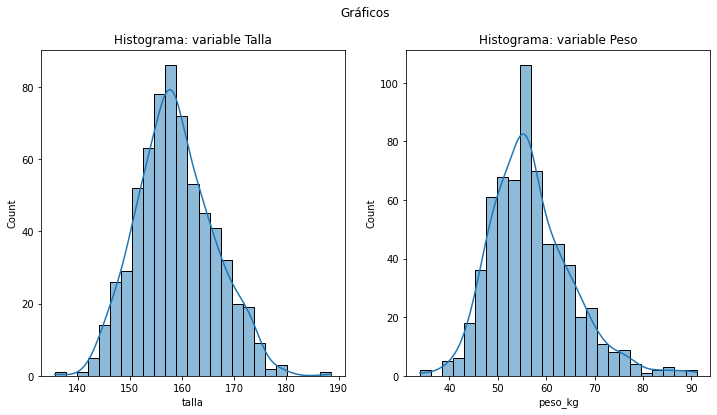

In [ ]:
# Gráfico distribución de las variables

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
fig.suptitle('Gráficos')

axes[0].set_title('Histograma: variable Talla')
axes[1].set_title('Histograma: variable Peso')

sns.histplot(data=data_nutricion_f, x="talla", kde=True, ax=axes[0])
sns.histplot(data=data_nutricion_f, x="peso_kg", kde=True,  ax=axes[1])
plt.show()

In [ ]:
# Correlación spearmanr
from scipy.stats import spearmanr

rho, p = spearmanr(data_nutricion_num2['talla'], data_nutricion_num2['peso_kg'])

print('Correlación Rho=%.3f, p-value=%.3f' % (rho, p))

Correlación Rho=0.445, p-value=0.000


Conclusión: Con un nivel de significancia del 5% se afirma que, la edad y el score son mutuamente dependientes, con una correlación de rho = 0.445.

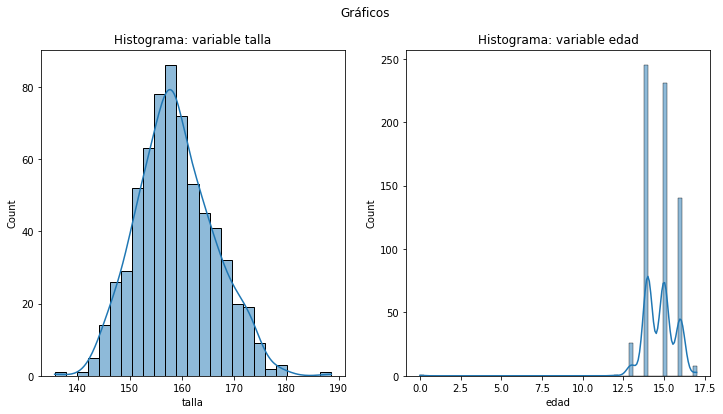

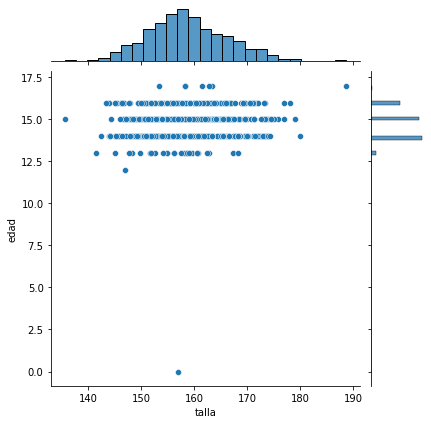

Correlación Rho=0.087, p-value=0.026
p <= 0.05
Con un nivel de significancia del 5% se afirma que, talla y edad son mutuamente dependientes, con una correlación de 0.087




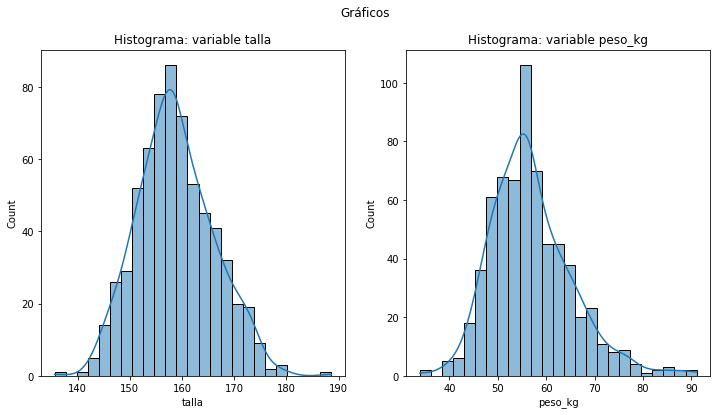

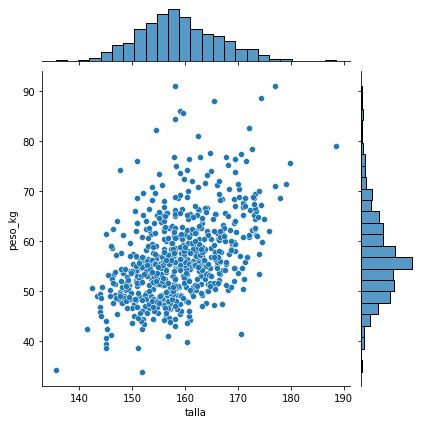

Correlación Rho=0.445, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5% se afirma que, talla y peso_kg son mutuamente dependientes, con una correlación de 0.445




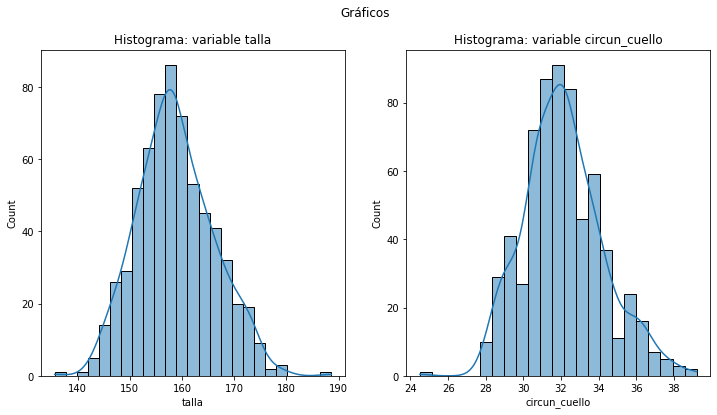

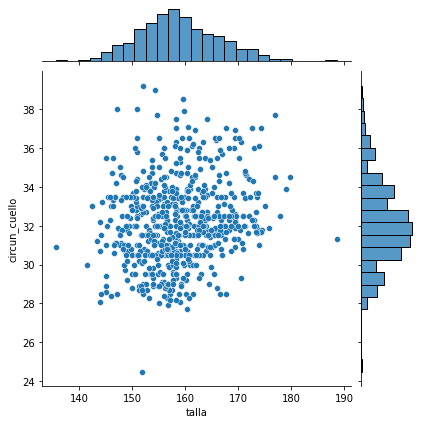

Correlación Rho=0.182, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5% se afirma que, talla y circun_cuello son mutuamente dependientes, con una correlación de 0.182




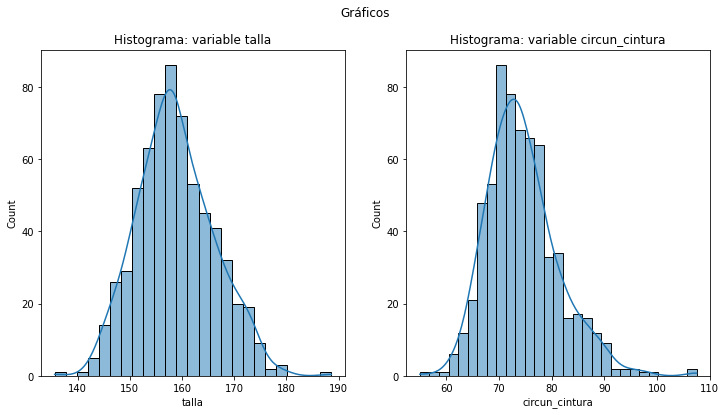

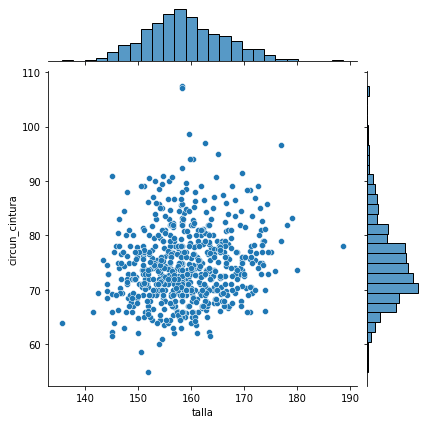

Correlación Rho=0.149, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5% se afirma que, talla y circun_cintura son mutuamente dependientes, con una correlación de 0.149




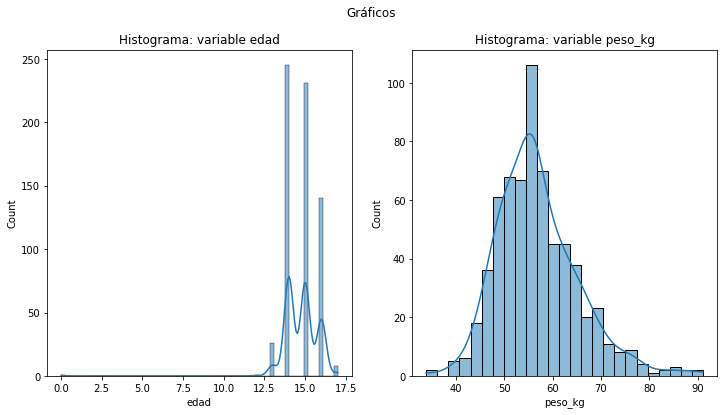

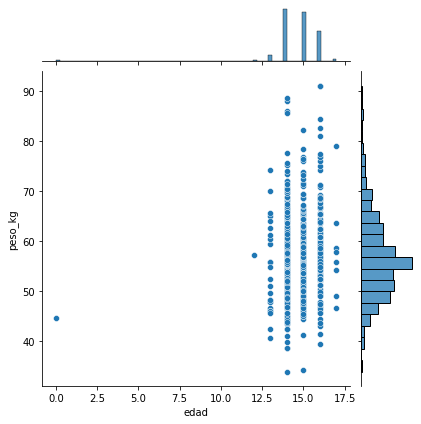

Correlación Rho=0.135, p-value=0.001
p <= 0.05
Con un nivel de significancia del 5% se afirma que, edad y peso_kg son mutuamente dependientes, con una correlación de 0.135




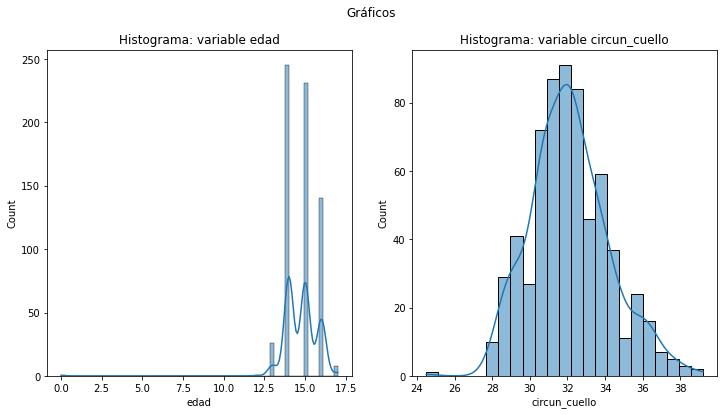

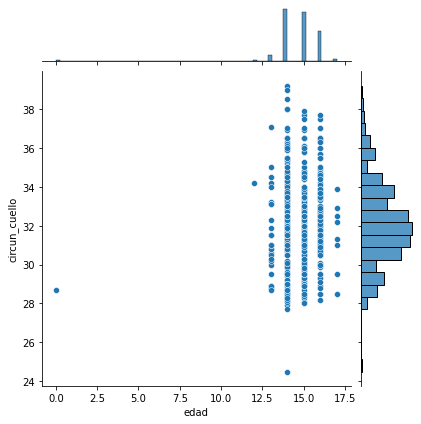

Correlación Rho=0.097, p-value=0.014
p <= 0.05
Con un nivel de significancia del 5% se afirma que, edad y circun_cuello son mutuamente dependientes, con una correlación de 0.097




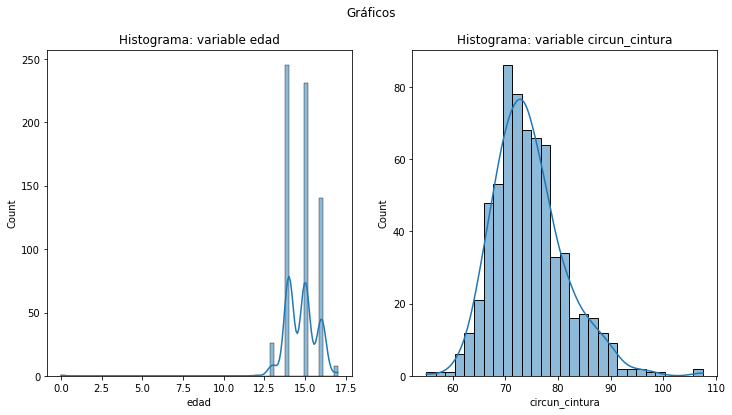

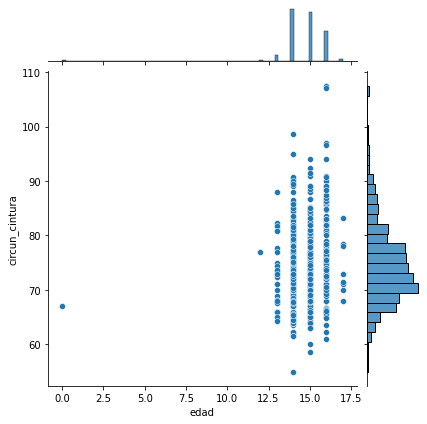

Correlación Rho=0.150, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5% se afirma que, edad y circun_cintura son mutuamente dependientes, con una correlación de 0.150




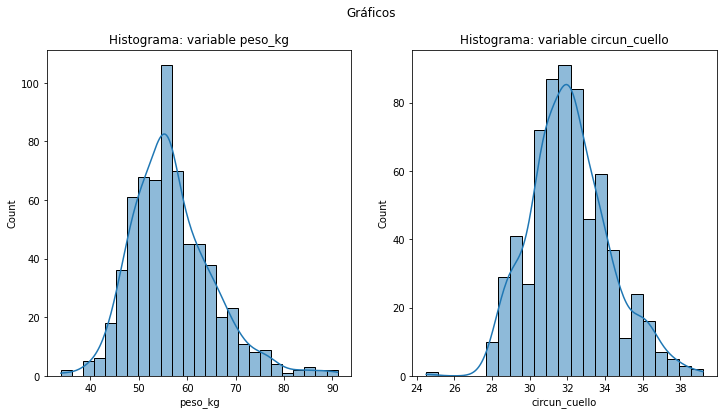

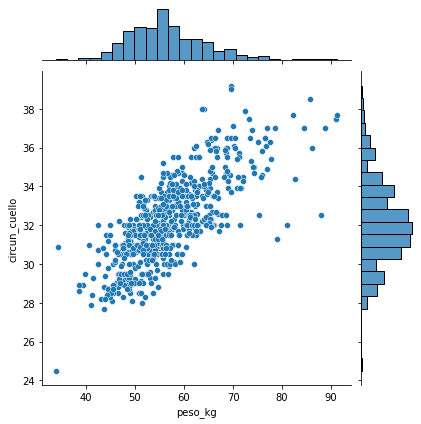

Correlación Rho=0.741, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5% se afirma que, peso_kg y circun_cuello son mutuamente dependientes, con una correlación de 0.741




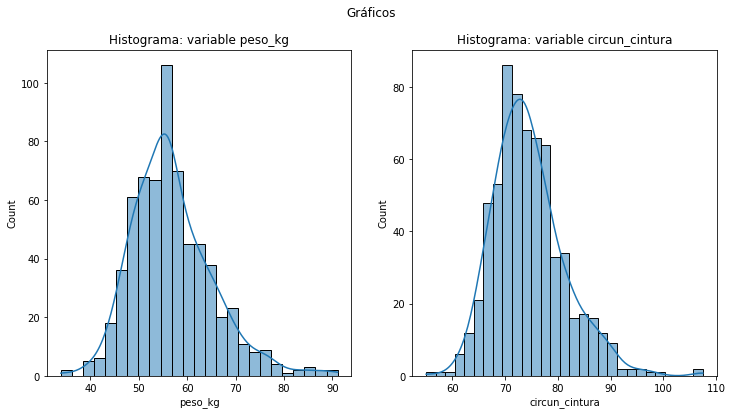

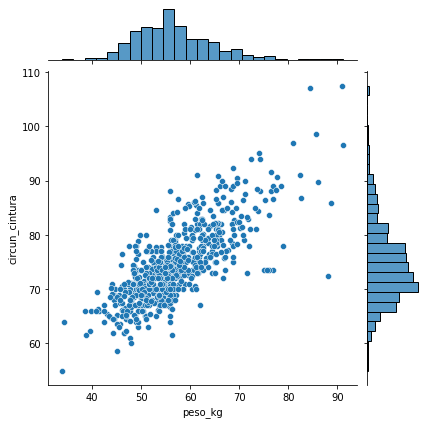

Correlación Rho=0.761, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5% se afirma que, peso_kg y circun_cintura son mutuamente dependientes, con una correlación de 0.761




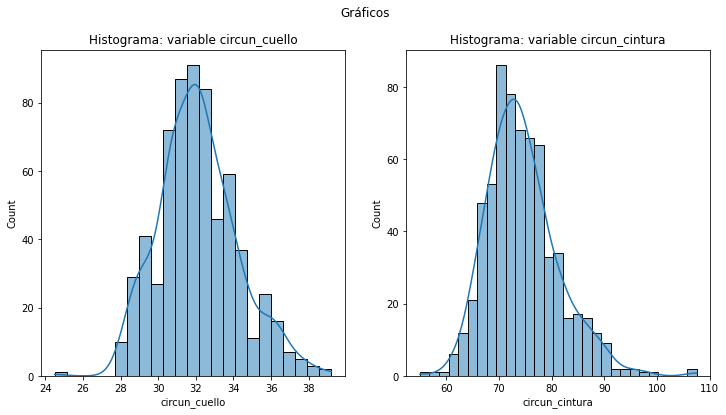

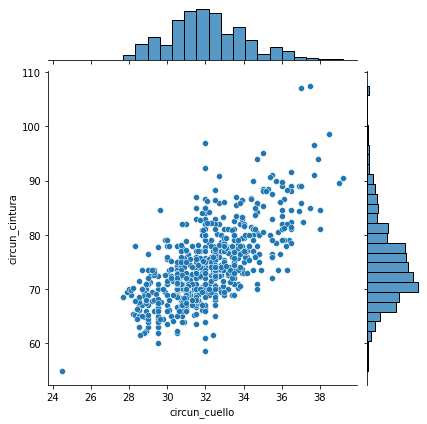

Correlación Rho=0.678, p-value=0.000
p <= 0.05
Con un nivel de significancia del 5% se afirma que, circun_cuello y circun_cintura son mutuamente dependientes, con una correlación de 0.678


In [ ]:
from scipy.stats import spearmanr

j=0
z=0
col_num2=['talla','edad','peso_kg','circun_cuello','circun_cintura']

while z != 1:
  
  for i in range(len(col_num2)-1):
    print('\n')
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
    fig.suptitle('Gráficos')

    axes[0].set_title('Histograma: variable ' + str(col_num2[j]))
    axes[1].set_title('Histograma: variable ' + str(col_num2[i+1]))

    sns.histplot(data=data_nutricion_f, x=col_num2[j], kde=True, ax=axes[0])
    sns.histplot(data=data_nutricion_f, x=col_num2[i+1], kde=True, ax=axes[1])
    plt.show()

    sns.jointplot(x=data_nutricion_f[col_num2[j]], y=data_nutricion_num2[col_num2[i+1]], ax=axes[0])
    #plt.title('Variables a correlacionar', loc= 'right')
    plt.show()

    # Correlación spearmanr
    rho, p = spearmanr(data_nutricion_num2[col_num2[j]], data_nutricion_num2[col_num2[i+1]])
    print('Correlación Rho=%.3f, p-value=%.3f' % (rho, p))

    #Decisión:
    if p <= 0.05:
      print('p <= 0.05')
      print('Con un nivel de significancia del 5% se afirma que, '+ str(col_num2[j]) + ' y ' + str(col_num2[i+1]) + ' son mutuamente dependientes, con una correlación de %.3f' % (rho))
    else:
      print('p > 0.05')
      print('Con un nivel de significancia del 5% se afirma que, '+ str(col_num2[j]) + ' y ' + str(col_num2[i+1]) + ' no son mutuamente dependientes, con una correlación de %.3f' % (rho))
    
  col_num2.remove(col_num2[j])

  if col_num2[0] == 'circun_cintura':
    z= 1


## Prueba U de Mann Whitney: muestras independientes

(no paramétrica)

Diferencia de medianas

Ho: U1 = U2; de la variable de estudio.

Ha: U1 <> U2; de la variable de estudio

Nivel de significancia: 5%

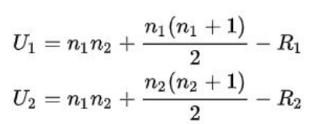

In [ ]:
# Extrayendo la data para la prueba:

talla_nutricion_A = data_nutricion_f[data_nutricion_f['Grupos'] =='A']['talla']
talla_nutricion_B = data_nutricion_f[data_nutricion_f['Grupos'] =='B']['talla']

print("Grupo A= \n", talla_nutricion_A)
print("Grupo B= \n", talla_nutricion_B)

Grupo A= 
 0      155.7
1      166.5
2      151.3
3      151.7
4      160.3
       ...  
332    149.2
333    157.5
334    174.5
335    167.5
336    166.4
Name: talla, Length: 337, dtype: float64
Grupo B= 
 337    153.0
338    160.0
339    151.6
340    150.9
341    162.7
       ...  
647    165.5
648    144.2
649    154.0
650    174.3
651    158.0
Name: talla, Length: 315, dtype: float64


In [ ]:
print("Grupo A --> n1: ", len(talla_nutricion_A))
print("Grupo B --> n2: ", len(talla_nutricion_B))

Grupo A --> n1:  337
Grupo B --> n2:  315


In [ ]:
from scipy.stats import kruskal

KW_test, p =kruskal(talla_nutricion_A, talla_nutricion_B)

print('Prueba de U de Mann Whitney=%.3f, p-value=%.3f' % (KW_test, p))

Prueba de U de Mann Whitney=0.003, p-value=0.957


In [ ]:
from scipy.stats import kruskal

col_num2=['talla','edad','peso_kg','circun_cuello','circun_cintura']

for col in col_num2:

  print('\t'+str(col)+':\n')

  data_nutricion_A = data_nutricion_f[data_nutricion_f['Grupos'] =='A'][col]
  data_nutricion_B = data_nutricion_f[data_nutricion_f['Grupos'] =='B'][col]

  print("Grupo A= \n", data_nutricion_A)
  print("Grupo B= \n", data_nutricion_B)

  print("\nGrupo A --> n1: ", len(data_nutricion_A))
  print("Grupo B --> n2: ", len(data_nutricion_B))

  KW_test, p =kruskal(data_nutricion_A, data_nutricion_B)

  print('\nPrueba de U de Mann Whitney=%.3f, p-value=%.3f' % (KW_test, p))

  #Decisión:
  if p <= 0.025:
    print('p <= 0.025')
    print('Con un nivel de significancia del 5%/2 se afirma que, U1 <> U2; de la variable de estudio\n\n')
  else:
    print('p > 0.025')
    print('Con un nivel de significancia del 5%/2 se afirma que, U1 = U2; de la variable de estudio\n\n')

	talla:

Grupo A= 
 0      155.7
1      166.5
2      151.3
3      151.7
4      160.3
       ...  
332    149.2
333    157.5
334    174.5
335    167.5
336    166.4
Name: talla, Length: 337, dtype: float64
Grupo B= 
 337    153.0
338    160.0
339    151.6
340    150.9
341    162.7
       ...  
647    165.5
648    144.2
649    154.0
650    174.3
651    158.0
Name: talla, Length: 315, dtype: float64

Grupo A --> n1:  337
Grupo B --> n2:  315

Prueba de U de Mann Whitney=0.003, p-value=0.957
p > 0.025
Con un nivel de significancia del 5%/2 se afirma que, U1 = U2; de la variable de estudio


	edad:

Grupo A= 
 0      16.0
1      16.0
2      16.0
3      16.0
4      16.0
       ... 
332    14.0
333    15.0
334    15.0
335    15.0
336    15.0
Name: edad, Length: 337, dtype: float64
Grupo B= 
 337    14.0
338    15.0
339    15.0
340    15.0
341    15.0
       ... 
647    14.0
648    14.0
649    15.0
650    14.0
651    14.0
Name: edad, Length: 315, dtype: float64

Grupo A --> n1:  337
Grupo B -->